### PCA Mini Project

In the lesson, you saw how you could use PCA to substantially reduce the dimensionality of the handwritten digits.  In this mini-project, you will be using the **cars.csv** file.  

To begin, run the cell below to read in the necessary libraries and the dataset.  I also read in the helper functions that you used throughout the lesson in case you might find them helpful in completing this project.  Otherwise, you can always create functions of your own!

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from helper_functions import do_pca, scree_plot, plot_components, pca_results
from IPython import display
import test_code2 as t

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('./data/cars.csv')

`1.` Now your data is stored in **df**.  Use the below cells to take a look your dataset.  At the end of your exploration, use your findings to match the appropriate variable to each key in the dictionary below.  

In [ ]:
#Use this cell for work

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387 entries, Acura 3.5 RL to Volvo XC90 T6
Data columns (total 18 columns):
Sports        387 non-null int64
SUV           387 non-null int64
Wagon         387 non-null int64
Minivan       387 non-null int64
Pickup        387 non-null int64
AWD           387 non-null int64
RWD           387 non-null int64
Retail        387 non-null int64
Dealer        387 non-null int64
Engine        387 non-null float64
Cylinders     387 non-null int64
Horsepower    387 non-null int64
CityMPG       387 non-null int64
HighwayMPG    387 non-null int64
Weight        387 non-null int64
Wheelbase     387 non-null int64
Length        387 non-null int64
Width         387 non-null int64
dtypes: float64(1), int64(17)
memory usage: 57.4+ KB


In [2]:
df.head()

,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Acura 3.5 RL,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
Acura 3.5 RL Navigation,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
Acura MDX,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
Acura NSX S,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
Acura RSX,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68


In [3]:
df.describe()

,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
count,387.000000,387.000000,387.000000,387.000000,387.0,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.116279,0.152455,0.072351,0.054264,0.0,0.201550,0.242894,33231.180879,30440.653747,3.127390,5.757106,214.444444,20.312661,27.263566,3532.457364,107.211886,184.961240,71.276486
std,0.320974,0.359926,0.259404,0.226830,0.0,0.401677,0.429387,19724.634576,17901.179282,1.014314,1.490182,70.262822,5.262333,5.636005,706.003622,7.086553,13.237999,3.368329
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,10280.000000,9875.000000,1.400000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000,64.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,20997.000000,19575.000000,2.300000,4.000000,165.000000,18.000000,24.000000,3107.000000,103.000000,177.000000,69.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,28495.000000,26155.000000,3.000000,6.000000,210.000000,19.000000,27.000000,3469.000000,107.000000,186.000000,71.000000
75%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,39552.500000,36124.000000,3.800000,6.000000,250.000000,21.500000,30.000000,3922.000000,112.000000,193.000000,73.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,192465.000000,173560.000000,6.000000,12.000000,493.000000,60.000000,66.000000,6400.000000,130.000000,221.000000,81.000000


In [7]:
df.Minivan.sum()/df.Minivan.count()

0.054263565891472867

In [ ]:
# and this one

In [ ]:
# and this one if you need it - and create more cells if you need them

In [8]:
a = 7
b = 66
c = 387
d = 18
e = 0.23
f = 0.05

solution_1_dict = {
    'The number of cars in the dataset': c, #letter here,
    'The number of car features in the dataset': d, #letter here,
    'The number of dummy variables in the dataset': a, #letter here,
    'The proportion of minivans in the dataset': f, #letter here,
    'The max highway mpg for any car': b#letter here
}

In [9]:
# Check your solution against ours by running this cell
display.HTML(t.check_question_one(solution_1_dict))

Nice job!  Looks like your dataset matches what we found!


`2.` There are some particularly nice properties about PCA to keep in mind.  Use the dictionary below to match the correct variable as the key to each statement.  When you are ready, check your solution against ours by running the following cell.

In [14]:
a = True
b = False

solution_2_dict = {
    'The components span the directions of maximum variability.': a, #letter here,
    'The components are always orthogonal to one another.': a, #letter here,
    'Eigenvalues tell us the amount of information a component holds': a, #letter here
}

In [15]:
# Check your solution against ours by running this cell
t.check_question_two(solution_2_dict)

That's right these are all true.  Principal components are orthogonal, span the directions of maximum variability, and the corresponding eigenvalues tell us how much of the original variability is explained by each component.


`3.` Fit PCA to reduce the current dimensionality of the datset to 3 dimensions.  You can use the helper functions, or perform the steps on your own.  If you fit on your own, be sure to standardize your data.  At the end of this process, you will want an X matrix with the reduced dimensionality to only 3 features.  Additionally, you will want your **pca** object back that has been used to fit and transform your dataset. 

In [28]:
#Scale your data, fit, and transform using pca
#you need a pca object and your transformed data matrix
pca, pca_df = do_pca(5, df)

`4.` Once you have your pca object, you can take a closer look at what comprises each of the principal components.  Use the **pca_results** function from the **helper_functions** module assist with taking a closer look at the results of your analysis.  The function takes two arguments: the full dataset and the pca object you created.

0.82400000000000007

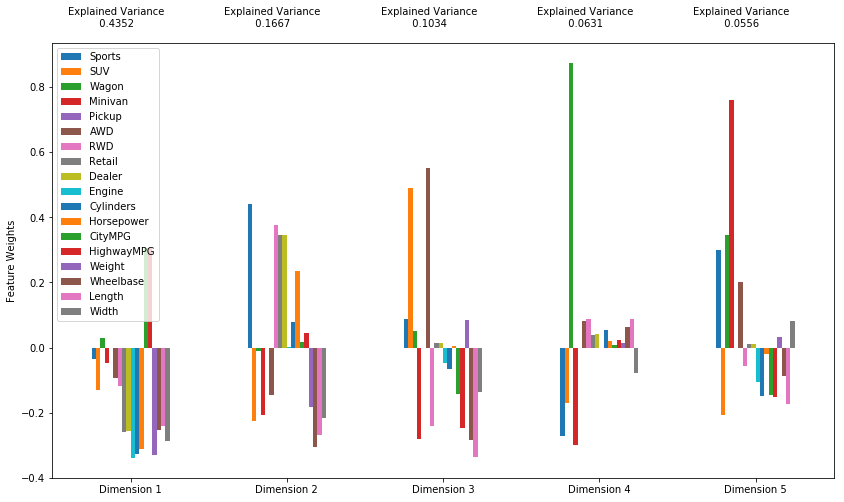

In [29]:
pca_results(df, pca)["Explained Variance"].sum()

`5.` Use the results, to match each of the variables as the value to the most appropriate key in the dictionary below.  When you are ready to check your answers, run the following cell to see if your solution matches ours!

In [21]:
a = 'car weight'
b = 'sports cars'
c = 'gas mileage'
d = 0.4352
e = 0.3061
f = 0.1667
g = 0.7053

solution_5_dict = {
    'The first component positively weights items related to': c, #letter here, 
    'The amount of variability explained by the first component is': d, #letter here,
    'The largest weight of the second component is related to': b, #letter here,
    'The total amount of variability explained by the first three components': g #letter here
}

In [22]:
# Run this cell to check if your solution matches ours.
t.check_question_five(solution_5_dict)

That's right!  Looks like you know a lot about PCA!


`6.` How many components need to be kept to explain at least 85% of the variability in the original dataset?  When you think you have the answer, store it in the variable `num_comps`.  Then run the following cell to see if your solution matches ours!

In [30]:
#Code to find number of components providing more than 
# 85% of variance explained

num_comps = 6 #num components stored here

In [31]:
# Now check your answer here to complete this mini project!
display.HTML(t.question_check_six(num_comps))

Nice job!  That's right!  With 6 components, you can explain more than 85% of the variability in the original dataset.
